<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_6_Lagrange_Cubic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Lagrange Interpolation**

#####Consider the following data, which are obtained from a smooth function also known as Runge’s function,
\begin{align}
  y = (1 + 25x^2)^{-1}
    \end{align}
```markdown
xi  | −1.00 | −0.80 | −0.60 | −0.40 | −0.20 | 0.00 | 0.20 | 0.40 | 0.60 | 0.80 | 1.00
-------------------------------------------------------------------------------------------
yi  | 0.038 | 0.058 | 0.100 | 0.200 | 0.500 | 1.00 | 0.50 | 0.20 | 0.10 | 0.058 | 0.038
```
**Fit a smooth curve through the data using the Lagrange polynomial interpolation.**
#####Note: The value at any point $x$ is simply:
\begin{align}
  P(x) = \sum_{j=0}^n y_j \prod_{i=0 \\[1em] iǂj} \frac{x-x_i}{x_j-x_i}
    \end{align}
**Find the interpolated value at the point $x = 0.7$.**
#####Manual:
\begin{align}
  P(0.7) = 0.038\frac{(0.7 + 0.8)(0.7 + 0.6)··· (0.7 − 0.8)(0.7 − 1.0)}{(−1.0 + 0.8)(−1.0 + 0.6)··· (−1.0 − 0.8)(−1.0 − 1.0)} + 0.058\frac{(0.7 + 1.0)(0.7 + 0.6)··· (0.7 − 0.8)(0.7 − 1.0)}{(−0.8 + 1.0)(−0.8 + 0.6)··· (−0.8 − 0.8)(−0.8 − 1.0)}+ ···
+ 0.038\frac{(0.7 + 1.0)(0.7 + 0.8)··· (0.7 − 0.6)(0.7 − 0.8)}{(1.0 + 1.0)(1.0 + 0.6)··· (1.0 − 0.6)(1.0 − 0.8)} = −0.226
    \end{align}

**Using Tabulated Data**

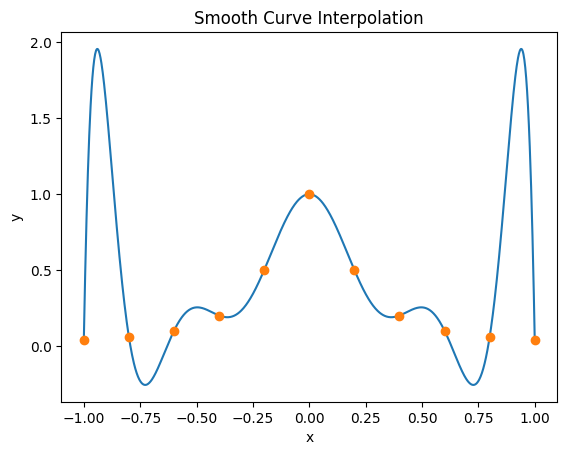

The interpolated value of y at x=0.7 is -0.226


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lagrange polynomial
def lagrange_poly(xi, yi, x):
    n = len(xi)
    y = 0.0
    for j in range(n):
        term = yi[j]
        for i in range(n):
            if i != j:
                term *= (x - xi[i]) / (xi[j] - xi[i])
        y += term
    return y

# Interpolate the data using the Lagrange polynomial
def interpolate(xi, yi, n=1000):
    xmin, xmax = min(xi), max(xi)
    x = np.linspace(xmin, xmax, n)
    y = [lagrange_poly(xi, yi, p) for p in x]
    return x, y

# Plot the smooth curve
def plot_smooth_curve(xi, yi):
    x, y = interpolate(xi, yi)
    plt.plot(x, y, label='Interpolated curve')
    plt.plot(xi, yi, 'o', label='Input data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Smooth Curve Interpolation')
    plt.show()

# Test the code
xi = np.array([-1.00, -0.80, -0.60, -0.40, -0.20, 0.00, 0.20, 0.40, 0.60, 0.80, 1.00])
yi = np.array([0.038, 0.058, 0.100, 0.200, 0.500, 1.00, 0.500, 0.200, 0.100, 0.058, 0.038])
plot_smooth_curve(xi, yi)

# Call the interpolate function with xi, yi, and n=1000
x_interp, y_interp = interpolate(xi, yi, n=1000)

# Find the index of the x_interp array closest to 0.7
index = np.abs(x_interp - 0.7).argmin()

# Print the interpolated value of y at 0.7
print(f"The interpolated value of y at x=0.7 is {y_interp[index]:.3f}")

**Task 2: Lagrange Interpolation With Non-equally Spaced Data**

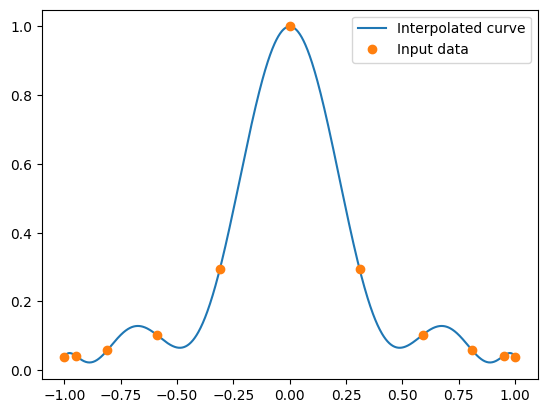

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
# using tabulated data
xi = np.array([-1.00, -0.95, -0.81, -0.59, -0.31, 0.00, 0.31, 0.59, 0.81, 0.95, 1.00])
yi = (1 + 25*xi**2)**(-1)

# Degree of the polynomial
deg = len(xi) - 1

# Lagrange polynomial interpolation
p = np.polyfit(xi, yi, deg)

# Evaluate the polynomial at 1000 equally spaced points in the interval [-1, 1]
x = np.linspace(-1, 1, 1000)
y = np.polyval(p, x)

# Plot the interpolated curve and the input data
plt.plot(x, y, label='Interpolated curve')
plt.plot(xi, yi, 'o', label='Input data')
plt.legend()
plt.show()

**Using polyfit from Numpy**

#####Use Runge’s function to generate a table of 21 equally spaced data points. Interpolate these data using a Lagrange polynomial of order 20. Plot this polynomial and compare between your result and the previous plot.

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


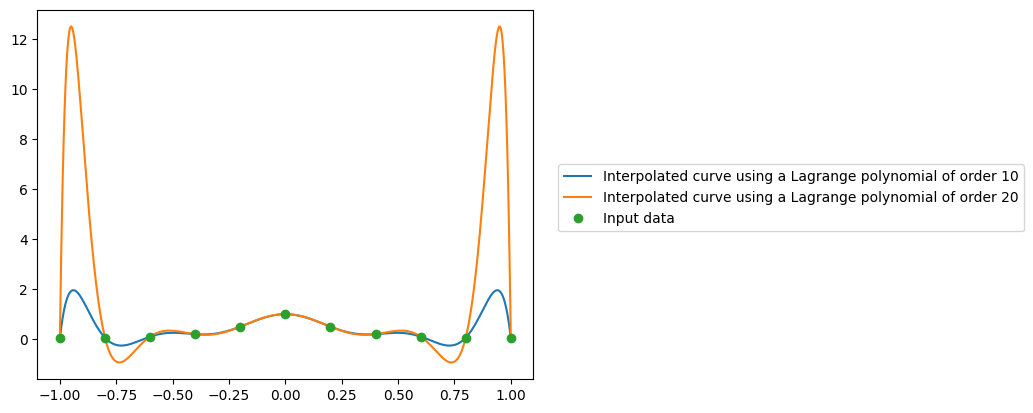

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
# using Runge’s function
xi = np.linspace(-1, 1, 11)
yi = (1 + 25*xi**2)**(-1)

# Degree of the polynomial
deg_prev = 10
deg_new = 20

# Lagrange polynomial interpolation
p_prev = np.polyfit(xi, yi, deg_prev)
p_new = np.polyfit(xi, yi, deg_new)

# Evaluate the polynomial at 1000 equally spaced points in the interval [-1, 1]
x = np.linspace(-1, 1, 1000)
y_prev = np.polyval(p_prev, x)
y_new = np.polyval(p_new, x)

# Plot the interpolated curve and the input data
plt.plot(x, y_prev, label='Interpolated curve using a Lagrange polynomial of order 10')
plt.plot(x, y_new, label='Interpolated curve using a Lagrange polynomial of order 20')
plt.plot(xi, yi, 'o', label='Input data')
plt.legend(loc=(1.05,0.4))
plt.show()

**Cubic spline using thomas algorithm**

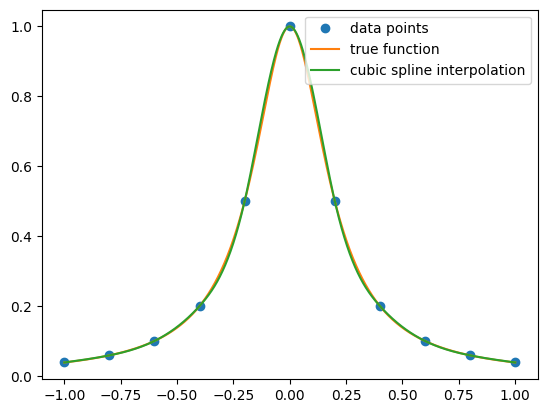

In [5]:
import numpy as np

def cubic_spline_interpolation(x, y):
    n = len(x)
    h = np.zeros(n-1)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]

    # Construct the tri-diagonal matrix 
    A = np.zeros((n-2, n-2))
    for i in range(n-2):
        if i > 0:
            A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i] + h[i+1])
        if i < n-3:
            A[i][i+1] = h[i+1]

    B = np.zeros(n-2)
    for i in range(n-2):
        B[i] = 6 * ((y[i+2]-y[i+1])/h[i+1] - (y[i+1]-y[i])/h[i])

    M = np.zeros(n)
    M[1:n-1] = np.linalg.solve(A, B)

    # Calculate the coefficients of the cubic spline (the piecewise polynomials)
    a = y[0:n-1]
    b = (y[1:n] - y[0:n-1]) / h - h / 6 * (2 * M[0:n-1] + M[1:n])
    c = M[0:n-1] / 2
    d = (M[1:n] - M[0:n-1]) / (6 * h)

    return a, b, c, d

# Define the function to be interpolated
f = lambda x: 1 / (1 + 25 * x ** 2)

# Define the range of x values to be interpolated
x = np.linspace(-1, 1, 11)

# Calculate the corresponding y values
y = f(x)

# Perform cubic spline interpolation
a, b, c, d = cubic_spline_interpolation(x, y)

# Define the range of x values for the plot
x_plot = np.linspace(-1, 1, 1001)

# Evaluate the cubic spline at the x values for the plot
y_plot = np.zeros(len(x_plot))
for i in range(len(x_plot)):
    for j in range(len(x)-1):
        if x[j] <= x_plot[i] <= x[j+1]:
            y_plot[i] = a[j] + b[j] * (x_plot[i] - x[j]) + c[j] * (x_plot[i] - x[j]) ** 2 + d[j] * (x_plot[i] - x[j]) ** 3

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='data points')
plt.plot(x_plot, f(x_plot), label='true function')
plt.plot(x_plot, y_plot, label='cubic spline interpolation')
plt.legend()
plt.show()

**Using CubicSpline from scipy.interpolate**

**Using Tabulated Data**

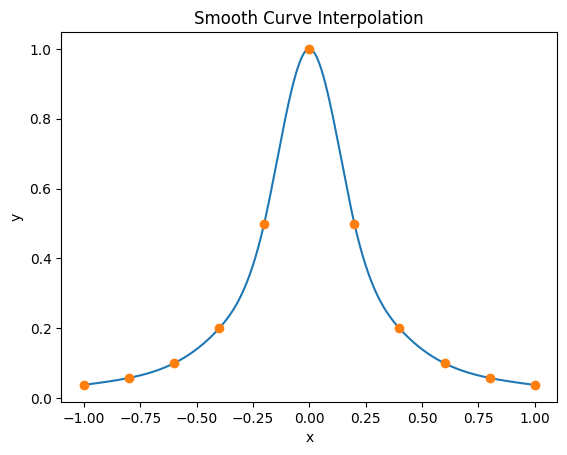

The interpolated value of y at x=0.7 is 0.074


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def plot_smooth_curve(xi, yi):
    x = np.linspace(xi[0], xi[-1], 1000)
    cs = CubicSpline(xi, yi, bc_type='natural')
    plt.plot(x, cs(x), label='Interpolated curve')
    plt.plot(xi, yi, 'o', label='Input data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Smooth Curve Interpolation')
    plt.show()

# Test the code
xi = np.array([-1.00, -0.80, -0.60, -0.40, -0.20, 0.00, 0.20, 0.40, 0.60, 0.80, 1.00])
yi = np.array([0.038, 0.058, 0.100, 0.200, 0.500, 1.00, 0.500, 0.200, 0.100, 0.058, 0.038])
plot_smooth_curve(xi, yi)

# Call the interpolate function with xi, yi, and n=1000
cs = CubicSpline(xi, yi, bc_type='natural')
x_interp = np.linspace(xi[0], xi[-1], 1000)
y_interp = cs(x_interp)

# Find the index of the x_interp array closest to 0.7
index = np.abs(x_interp - 0.7).argmin()

# Print the interpolated value of y at 0.7
print(f"The interpolated value of y at x=0.7 is {y_interp[index]:.3f}")

**Using Runge's function for more grid data**

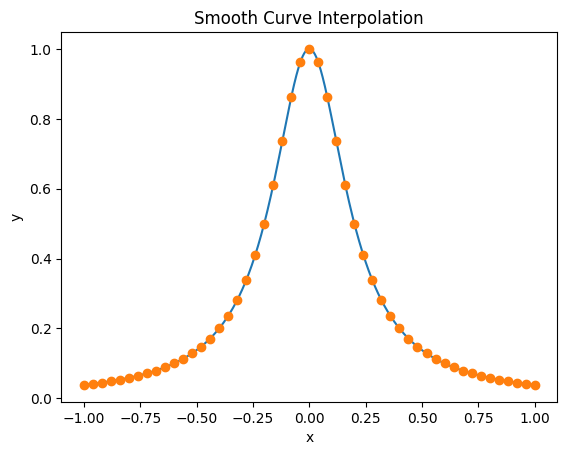

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def plot_smooth_curve(xi, yi):
    x = np.linspace(xi[0], xi[-1], 1000)
    cs = CubicSpline(xi, yi, bc_type='natural')
    plt.plot(x, cs(x), label='Interpolated curve')
    plt.plot(xi, yi, 'o', label='Input data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Smooth Curve Interpolation')
    plt.show()

# Test the code
xi = np.linspace(-1, 1, 51)
yi = (1 + 25*xi**2)**(-1)
plot_smooth_curve(xi, yi)